<a href="https://colab.research.google.com/github/girotodenis/python/blob/master/RelatorioTesteCarga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
%%capture

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt   
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline  

py.init_notebook_mode(connected=False)

In [61]:
df = pd.read_csv('/content/epol-teste-consultas-menu.csv')
#df = pd.read_csv('/content/epol-teste-consultas-menu4x3000_4.csv')
#df.success.astype(str)
#df.success.replace('False','false')
#df.success.replace('f','false')
#df.success.replace('True	','true	')
#dft = df['timeStamp'].values.astype(dtype='datetime64[ms]')
df.columns

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['timeStamp', 'elapsed', 'label', 'responseCode', 'responseMessage',
       'threadName', 'dataType', 'success', 'failureMessage', 'bytes',
       'sentBytes', 'grpThreads', 'allThreads', 'URL', 'Latency', 'IdleTime',
       'Connect'],
      dtype='object')

In [62]:
df2 = df.groupby(['success']).size().reset_index(name='counts')
df2.head()

,success,counts
0,False,21948
1,True,240196
2,f,1
3,false,2650
4,true,10526


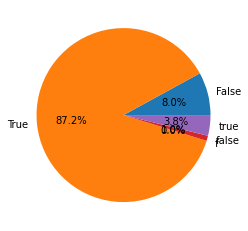

In [63]:

#explode = (0,0.2)
#plt.pie(x=df2.counts, labels=df2.success,explode=explode, autopct='%1.1f%%')
plt.pie(x=df2.counts, labels=df2.success, autopct='%1.1f%%')

plt.show()

In [33]:
df.label.unique()

array(['Login', 'Meu Usuário', 'Minhas Colunas Desmarcadas',
       'Meus Casos (primeira página)', 'Contador Pendentes na Unidade',
       'Estados do Brasil', 'Contadores Meus Casos',
       'Contador Pauta Cartorária', 'Meus Casos (IPL)',
       'Meus Casos (FLA)', 'Meus Casos (NC)',
       'Meus Casos (pesquisa textual)', 'Meus Casos (recebidos)',
       'Meus Casos (conclusos)', 'Meus Casos (pendentes)',
       'Meus Casos (aguardando)', 'Meus Casos (remetidos)',
       'Estados no Judiciário', 'Lista de Marcadores',
       'Filtro de Marcadores',
       'Minhas Peças com Marcadores (filtro de marcador)',
       'Minhas Peças com Marcadores',
       'Minhas Peças com Marcadores (pesquisa textual)',
       'Lista de Etiquetas', 'Pendentes na Unidade',
       'Pendentes na Unidade (pesquisa textual)', 'Minhas Tarefas',
       'Árvore com Salas', 'Preferências do Usuário (pauta)',
       'Quantidade de Intimações (atuais)',
       'Quantidade de Intimações (herdadas)', 'Pauta Cartorá

In [116]:
value_list = [
#       'Etiquetas dos Casos Pendentes',
#      'Meu Usuário', 
#       'Minhas Colunas Desmarcadas',
#       'Meus Casos (primeira página)', 
#       'Contador Pendentes na Unidade',
#       'Estados do Brasil', 
       'Contadores Meus Casos',
#       'Contador Pauta Cartorária', 
#       'Meus Casos (IPL)',
#       'Meus Casos (FLA)', 
#       'Meus Casos (NC)',
#       'Meus Casos (pesquisa textual)',
#       'Meus Casos (recebidos)',
#      'Meus Casos (conclusos)', 
#      'Meus Casos (pendentes)',
#       'Meus Casos (aguardando)', 
#       'Meus Casos (remetidos)',
#       'Estados no Judiciário',
#       'Lista de Marcadores',
#       'Filtro de Marcadores',
#       'Minhas Peças com Marcadores (filtro de marcador)',
#       'Minhas Peças com Marcadores',
#       'Minhas Peças com Marcadores (pesquisa textual)',
#       'Lista de Etiquetas', 
#       'Pendentes na Unidade',
#       'Pendentes na Unidade (pesquisa textual)', 
#       'Minhas Tarefas',
#       'Árvore com Salas', 'Preferências do Usuário (pauta)',
#       'Quantidade de Intimações (atuais)',
#       'Quantidade de Intimações (herdadas)', 
#       'Pauta Cartorária (atual)',
       'Pauta Cartorária (herdadas)', 
#       'Pauta Cartorária (histórico)',
#       'Árvore de Unidades', 
#       'Árvore de Unidades (servidor)',
#       'Meus Casos (primeira página IPL)', 
#       'Meu Caso (conduta)',
#       'Meu Caso (envolvido)', 
#       'Meu Caso (preferenciaUsuario)',
#       'Meu Caso (associado)', 
#       'Meu Caso (getTodosOsTipos)',
#       'Meu Caso (templatePeca)', 
#       'Meu Caso (possuiSincronizacao)',
#       'Meu Caso (peca)', 
#       'Meu Caso (contadorPecasNaoDisponibilizadas)',
      # '1 POST Meu Caso (criar peca) *', 
#      '2 POST Meu Caso (criar peca) *',
#       '1 PUT Meu Caso (criar peca update) *',
#       'Meu Caso (peca assinadas)', 
#       'Meu Usuário 2',
#       '1 PUT Meu Caso (criar peca assinar) *', 
#       '1 Meu Caso (documento)',
#       '1 PATCH Meu Caso (criar peca disponibilizar) *',
#       '2 PUT Meu Caso (criar peca update) *',
#       '2 PUT Meu Caso (criar peca assinar) *', 
#       '2 Meu Caso (documento)',
#       'Redistribuição de Carga (primeira página)',
#       'Etiquetas Meus Casos', 
#       'Meu Caso (documento)',
       'Login'
       ]
boolean_series = df.label.isin(value_list)
amostra = df[boolean_series]
amostra
df_1 = pd.pivot_table(amostra, values='Latency', index=['label'], columns=['timeStamp'], aggfunc = 'mean')


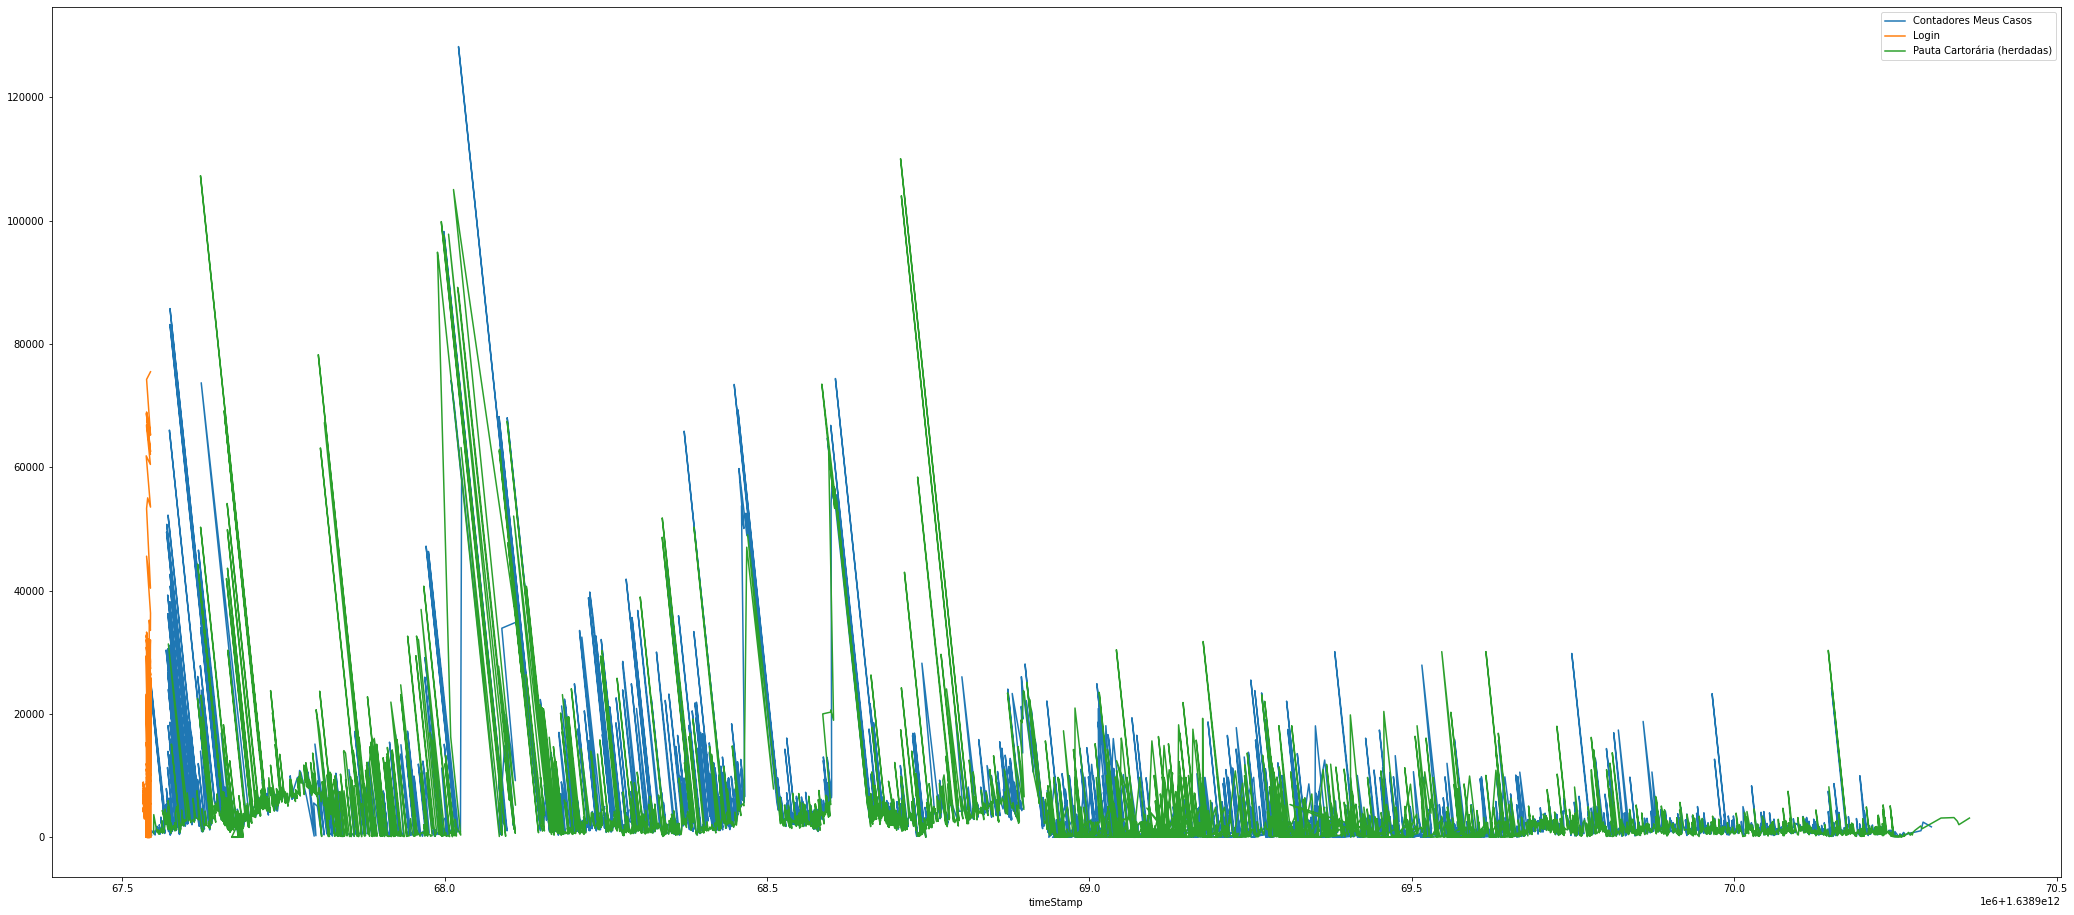

In [117]:
#amostra.plot.line(x="timeStamp", y="Latency", title=label)

fig, ax = plt.subplots(figsize=(36,16))

for key, grp in amostra.groupby(['label']):
    ax = grp.plot(ax=ax, kind='line', x='timeStamp', y='Latency', label=key)

plt.legend(loc='best')
plt.show()

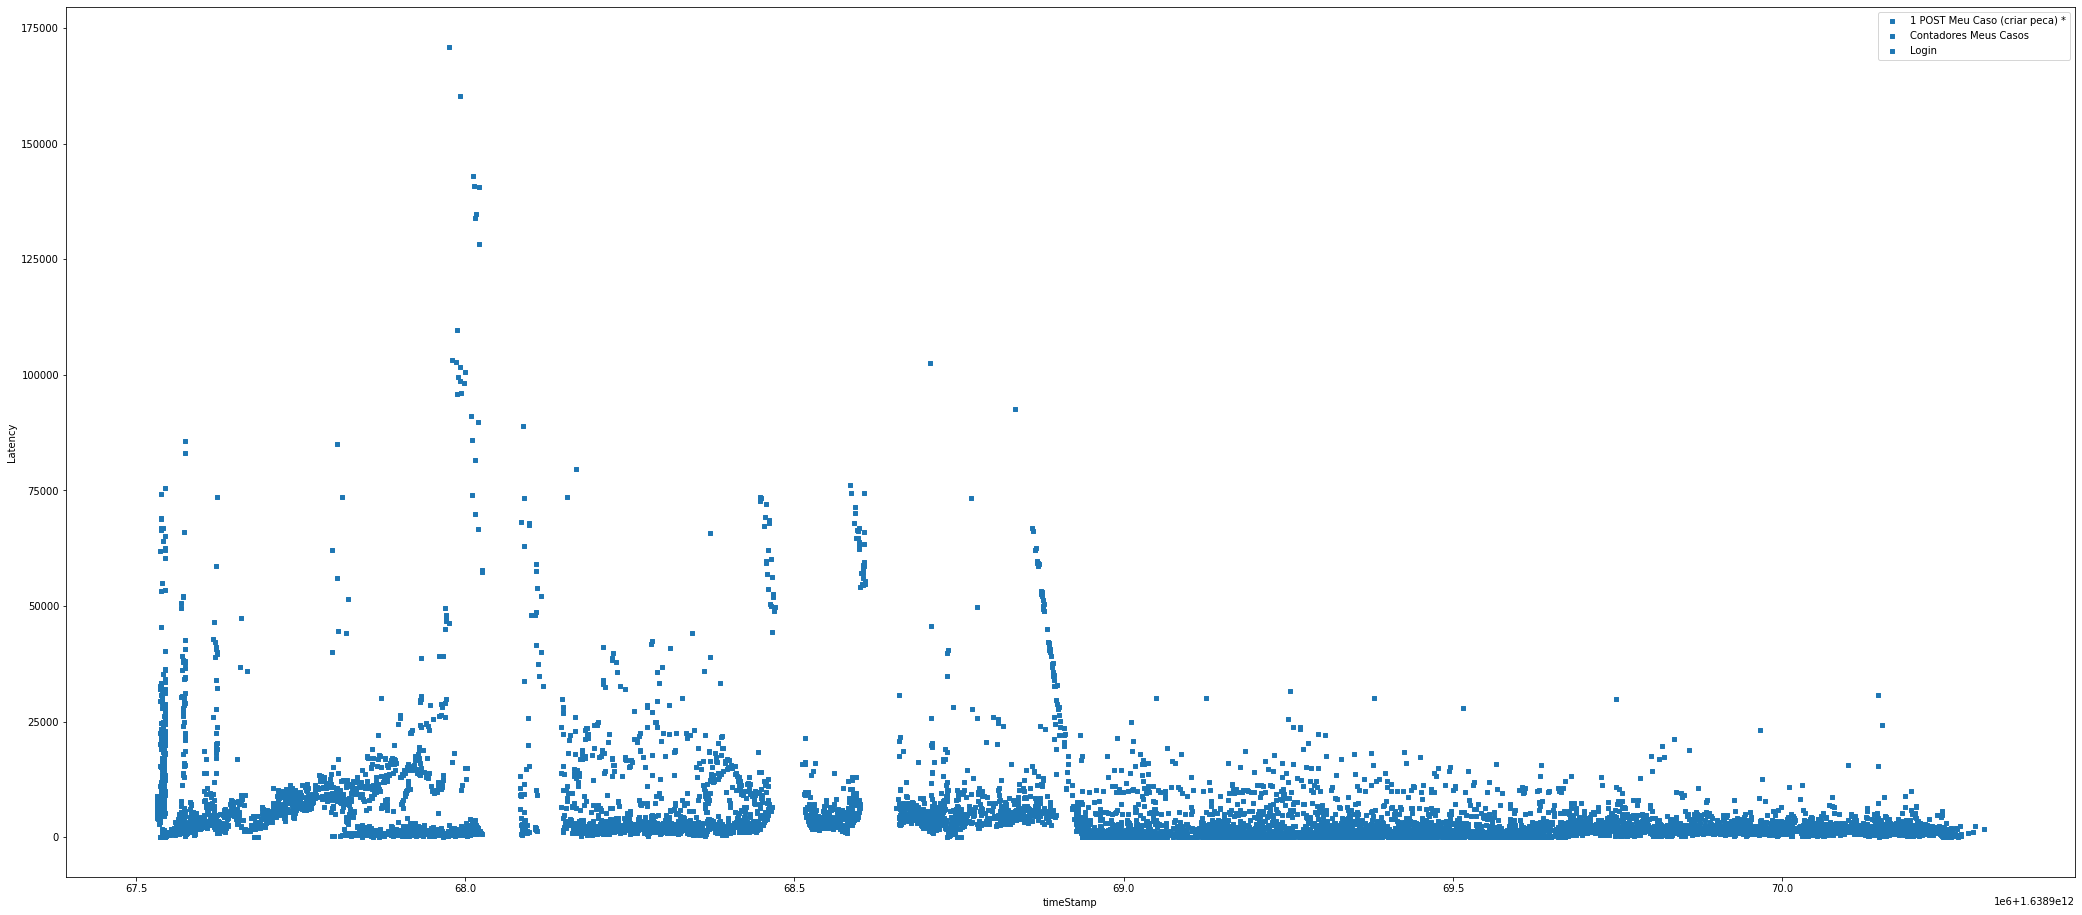

In [113]:
fig, ax = plt.subplots(figsize=(36,16))

for key, grp in amostra.groupby(['label']):
    ax = grp.plot(ax=ax, kind='scatter', x='timeStamp', y='Latency',marker="s", label=key)

plt.legend(loc='best')
plt.show()